In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
print( f"Python {sys.version}\nPandas {pd.__version__}\nNumPy {np.__version__}\nMatplotlib{mpl.__version__}" ) 

Python 3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0]
Pandas 1.3.5
NumPy 1.21.6
Matplotlib3.2.2


In [116]:
df_pm = pd.read_excel('/content/drive/MyDrive/DADS/DADS5001/MiniProject/PM2.5(2021).xlsx')
df_pm2 = pd.read_excel('/content/drive/MyDrive/DADS/DADS5001/MiniProject/PM2.5(2021).xlsx',sheet_name='พารามิเตอร์_สถานี')
df_pm2020 = pd.read_excel('/content/drive/MyDrive/DADS/DADS5001/MiniProject/PM2.5(2020).xlsx')
df_pm2019 = pd.read_excel('/content/drive/MyDrive/DADS/DADS5001/MiniProject/PM2.5(2019).xlsx')

In [3]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [118]:
new_df = pd.DataFrame()
new_df['2019'] = pm2019['PM2.5(2019)']
new_df['2020'] = pm2020['PM2.5(2020)']
new_df['2021'] = pm2021['PM2.5(2021)']
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20832 entries, 0 to 20831
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2019    20832 non-null  float64
 1   2020    20832 non-null  float64
 2   2021    20832 non-null  float64
dtypes: float64(3)
memory usage: 488.4 KB


In [117]:
pm2019 = df_pm2019.iloc[:,1:].melt().drop('variable',axis=1).rename({'value':'PM2.5(2019)'},axis=1)
pm2019 = pm2019.dropna().reset_index(drop=True)
pm2020 = df_pm2020.iloc[:,1:].melt().drop('variable',axis=1).rename({'value':'PM2.5(2020)'},axis=1)
pm2020 = pm2020.dropna().reset_index(drop=True)
pm2021 = df_pm.iloc[:,1:].melt().drop('variable',axis=1).rename({'value':'PM2.5(2021)'},axis=1)
pm2021 = pm2021.dropna().reset_index(drop=True)

Text(0, 0.5, 'PM2.5(microgram/m³)')

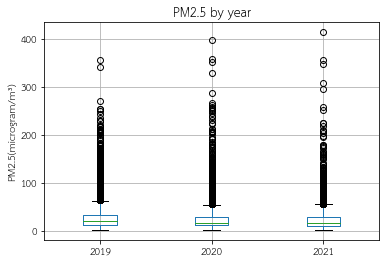

In [121]:
boxplot = new_df.boxplot(column=['2019', '2020', '2021']) 
boxplot.set_title('PM2.5 by year')
boxplot.set_ylabel('PM2.5(microgram/m³)')

In [122]:
#1.	Transpose dataframe ข้อมูลปริมาณฝุ่น PM2.5 เพื่อทำการ join ข้อมูลรหัสสถานีวัดฝุ่นจากอีก data sheet
df_pm_tsp = df_pm.T.reset_index(drop=False)
df_pm_tsp = df_pm_tsp.rename(columns=df_pm_tsp.iloc[0]).drop(df_pm_tsp.index[0])
df_pm2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ลำดับ                      78 non-null     float64
 1   รหัสสถานี                  78 non-null     object 
 2   ชื่อสถานี                  78 non-null     object 
 3   รายละเอียดจุดติดตั้งสถานี  78 non-null     object 
dtypes: float64(1), object(3)
memory usage: 2.6+ KB


In [145]:
#2.	Join data จาก sheet ที่ 2 โดย merge ข้อมูลรหัสสถานีวัด
df_pm2 = df_pm2.loc[:,['รหัสสถานี','ชื่อสถานี','รายละเอียดจุดติดตั้งสถานี']]
df_pmnew = pd.merge( df_pm_tsp, df_pm2, left_on='Date', right_on='รหัสสถานี', how='outer' )
df_pmnew['Non_nan'] = df_pmnew.count(axis=1)

In [146]:
#3.	Drop column ตำแหน่งเครื่องวัดค่าฝุ่นที่มีผลการวัดน้อยกว่า 30 วัน 
filternan = df_pmnew[(df_pmnew['Non_nan'] <= 30)].index
df_pmnew.drop(filternan , inplace=True)
df_pmnew['Avg.pm2.5'] = df_pmnew.iloc[:,1:366].mean(axis=1).round(decimals=2)
avgpm_max = df_pmnew.sort_values('Avg.pm2.5',ascending = False).reset_index(drop=True)
avgpm_min = df_pmnew.sort_values('Avg.pm2.5',ascending = True)

In [147]:
df_avgmax = avgpm_max.loc[0:4,['รหัสสถานี','ชื่อสถานี','Non_nan','Avg.pm2.5']]
df_avgmax

,รหัสสถานี,ชื่อสถานี,Non_nan,Avg.pm2.5
0,73T,ต.เวียงพางคำ อ.แม่สาย จ.เชียงราย,364,39.59
1,18T,ต.ปากน้ำ อ.เมือง จ.สมุทรปราการ,369,33.69
2,54T,ริมถนนดินแดง แขวงดินแดง เขตดินแดง กทม.,367,32.59
3,03T,ริมถนนกาญจนาภิเษก แขวงแสมดำ เขตบางขุนเทียน กทม.,365,30.33
4,46T,ต.ในเมือง อ.เมือง จ.ขอนแก่น,355,30.10


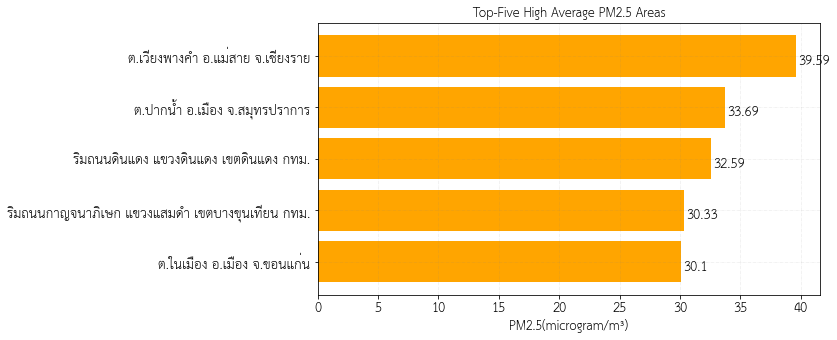

In [148]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(df_avgmax['ชื่อสถานี'],df_avgmax['Avg.pm2.5'],color='orange')
ax.grid(b=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=13, fontweight='bold',
             color='black',va='center')
    
ax.set_title('Top-Five High Average PM2.5 Areas')
ax.set_xlabel('PM2.5(microgram/m³)',fontsize=12)

plt.show()

In [149]:
df_bday = df_pmnew
df_bday['Unhealthy_Day'] = df_bday.iloc[:,1:366].ge(55).sum(axis=1)

In [151]:
df_bday['%Unhealthy_Day'] = ((df_bday['Unhealthy_Day']/df_bday['Non_nan'])*100).round(decimals=2)
df_bday = df_bday.sort_values('%Unhealthy_Day',ascending = False).reset_index(drop=True)

In [152]:
df_pmnew['Good_Day'] = df_pmnew.iloc[:,1:366].le(12).sum(axis=1)

df_gday = df_pmnew.sort_values('Good_Day',ascending = False).reset_index(drop=True)
df_gday['%Good_Day'] = ((df_gday['Good_Day']/df_gday['Non_nan'])*100).round(decimals=2)

In [153]:
df_tgday = df_gday.loc[0:4,['รหัสสถานี','ชื่อสถานี','Good_Day','%Good_Day']]
df_tgday

,รหัสสถานี,ชื่อสถานี,Good_Day,%Good_Day
0,78T,ต.เบตง อ.เบตง จ.ยะลา,279,78.37
1,82T,ต.มีชัย อ.เมือง จ.หนองคาย,250,68.68
2,84T,ต.ลาดใหญ่ อ.เมือง จ.สมุทรสงคราม,213,59.17
3,71T,ต.อรัญประเทศ อ.อรัญประเทศ จ.สระแก้ว,213,57.88
4,39T,ต.บ้านดง อ.แม่เมาะ จ.ลำปาง,206,57.22


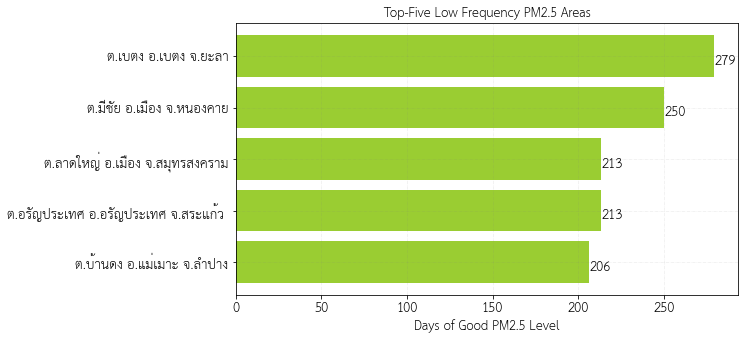

In [154]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.barh(df_tgday['ชื่อสถานี'],df_tgday['Good_Day'],color='yellowgreen')
ax.grid(b=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=13, fontweight='bold',
             color='black',va='center')
    
ax.set_title('Top-Five Low Frequency PM2.5 Areas')
ax.set_xlabel('Days of Good PM2.5 Level',fontsize=12)

plt.show()

In [155]:
df_tbday = df_bday.loc[0:4,['รหัสสถานี','ชื่อสถานี','Unhealthy_Day','%Unhealthy_Day']]
df_tbday

,รหัสสถานี,ชื่อสถานี,Unhealthy_Day,%Unhealthy_Day
0,73T,ต.เวียงพางคำ อ.แม่สาย จ.เชียงราย,63,17.31
1,37T,ต.พระบาท อ.เมือง จ.ลำปาง,62,16.85
2,76T,ต.แม่ปะ อ.แม่สอด จ.ตาก,53,14.72
3,39T,ต.บ้านดง อ.แม่เมาะ จ.ลำปาง,51,14.17
4,70T,ต.บ้านต๋อม อ.เมืองพะเยา จ.พะเยา,48,13.08


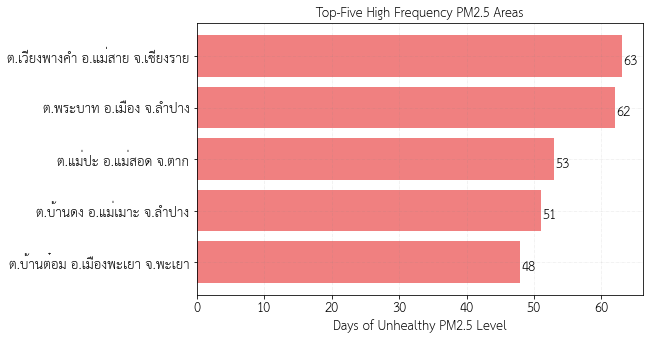

In [156]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(df_tbday['ชื่อสถานี'],df_tbday['Unhealthy_Day'],color='lightcoral')
ax.grid(b=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=13, fontweight='bold',
             color='black',va='center')
    
ax.set_title('Top-Five High Frequency PM2.5 Areas')
ax.set_xlabel('Days of Unhealthy PM2.5 Level',fontsize=12)

plt.show()

In [ ]:
df_north = df_pm.loc[:,['Date','37T','39T','70T','73T','76T']]
df_north

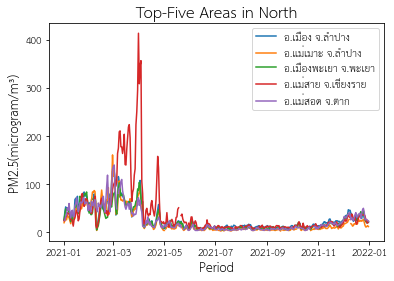

In [159]:
plt.plot(df_north['Date'],df_north['37T'],label='อ.เมือง จ.ลำปาง')
plt.plot(df_north['Date'],df_north['39T'],label='อ.แม่เมาะ จ.ลำปาง')
plt.plot(df_north['Date'],df_north['70T'],label='อ.เมืองพะเยา จ.พะเยา')
plt.plot(df_north['Date'],df_north['73T'],label='อ.แม่สาย จ.เชียงราย')
plt.plot(df_north['Date'],df_north['76T'],label='อ.แม่สอด จ.ตาก')
plt.legend()
plt.ylabel('PM2.5(microgram/m³)', fontsize=12)
plt.xlabel('Period', fontsize=12)
plt.title('Top-Five Areas in North', fontsize=15)
plt.show()

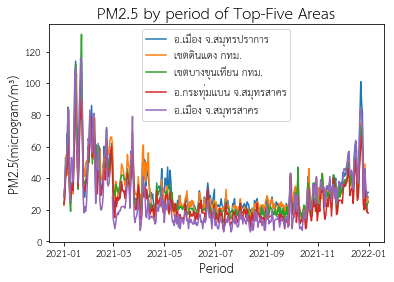

In [160]:
df_avgmax20 = avgpm_max.loc[0:19,['รหัสสถานี','ชื่อสถานี','Non_nan','Avg.pm2.5']]
df_central5 = df_pm.loc[:,['Date','18T','54T','03T','14T','27T']]

plt.plot(df_central5['Date'],df_central5['18T'],label='อ.เมือง จ.สมุทรปราการ')
plt.plot(df_central5['Date'],df_central5['54T'],label='เขตดินแดง กทม.')
plt.plot(df_central5['Date'],df_central5['03T'],label='เขตบางขุนเทียน กทม.')
plt.plot(df_central5['Date'],df_central5['14T'],label='อ.กระทุ่มแบน จ.สมุทรสาคร')
plt.plot(df_central5['Date'],df_central5['27T'],label='อ.เมือง จ.สมุทรสาคร')
plt.legend()
plt.ylabel('PM2.5(microgram/m³)', fontsize=12)
plt.xlabel('Period', fontsize=12)
plt.title('PM2.5 by period of Top-Five Areas', fontsize=15)
plt.show()

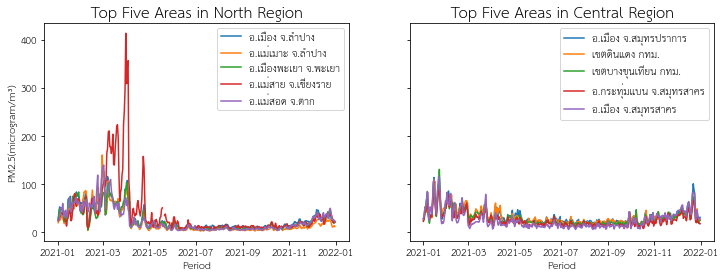

In [161]:
fig, axs = plt.subplots(nrows=1, ncols=2,sharey= True,figsize=(12,4))

axs[0].plot(df_north['Date'],df_north['37T'],label='อ.เมือง จ.ลำปาง')
axs[0].plot(df_north['Date'],df_north['39T'],label='อ.แม่เมาะ จ.ลำปาง')
axs[0].plot(df_north['Date'],df_north['70T'],label='อ.เมืองพะเยา จ.พะเยา')
axs[0].plot(df_north['Date'],df_north['73T'],label='อ.แม่สาย จ.เชียงราย')
axs[0].plot(df_north['Date'],df_north['76T'],label='อ.แม่สอด จ.ตาก')

axs[0].set_title('Top Five Areas in North Region', fontsize=15)

axs[1].plot(df_central5['Date'],df_central5['18T'],label='อ.เมือง จ.สมุทรปราการ')
axs[1].plot(df_central5['Date'],df_central5['54T'],label='เขตดินแดง กทม.')
axs[1].plot(df_central5['Date'],df_central5['03T'],label='เขตบางขุนเทียน กทม.')
axs[1].plot(df_central5['Date'],df_central5['14T'],label='อ.กระทุ่มแบน จ.สมุทรสาคร')
axs[1].plot(df_central5['Date'],df_central5['27T'],label='อ.เมือง จ.สมุทรสาคร')

axs[1].set_title('Top Five Areas in Central Region', fontsize=15)

axs[0].set_ylabel('PM2.5(microgram/m³)')
axs[0].set_xlabel('Period')
axs[1].set_xlabel('Period')
axs[0].legend()
axs[1].legend()
plt.show()